## Exploratory Data Analysis

# Placeholder Image

Second step of an analytics project is to perfrom Exploratory Analysis so that we can 
1. Observe trends and relationships between factors/variables to better understand the dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

heart_attack_df EDA

In [2]:
heart_atk_df = pd.read_csv('datasets/heart_attack_cleaned.csv')
heart_atk_clean_df = pd.read_csv('datasets/heart_attack_cleaned_text.csv')

In [3]:
heart_atk_clean_df

,age,sex,chest_pain,resting_blood_pressure,chol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_induced_angina,num_of_major_vessels,thal_rate,heart_attack_chance
0,63,Male,non-anginal pain,145,233,True,normal,150,No,0,1,more chance
1,37,Male,atypical angina,130,250,False,having ST-T wave abnormality,187,No,0,2,more chance
2,41,Female,typical angina,130,204,False,normal,172,No,0,2,more chance
3,56,Male,typical angina,120,236,False,having ST-T wave abnormality,178,No,0,2,more chance
4,57,Female,0,120,354,False,having ST-T wave abnormality,163,Yes,0,2,more chance
...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,Female,0,140,241,False,having ST-T wave abnormality,123,Yes,0,3,less chance
299,45,Male,non-anginal pain,110,264,False,having ST-T wave abnormality,132,No,0,3,less chance
300,68,Male,0,144,193,True,having ST-T wave abnormality,141,No,2,3,less chance
301,57,Male,0,130,131,False,having ST-T wave abnormality,115,Yes,1,3,less chance


In [4]:
#可以看到数值变量不多，绝大多数是类别变量，所以我们初步分析一下年龄和血压、心率、chol（为数不多的几个数值变量之间的关系吧）

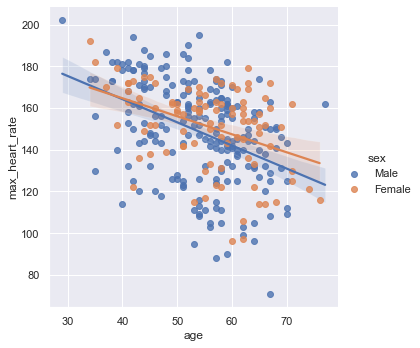

In [5]:
import seaborn as sns
sns.lmplot(x = 'age', y = 'max_heart_rate', data = heart_atk_clean_df, hue = 'sex')

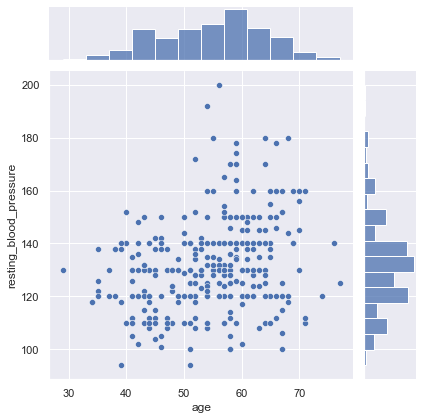

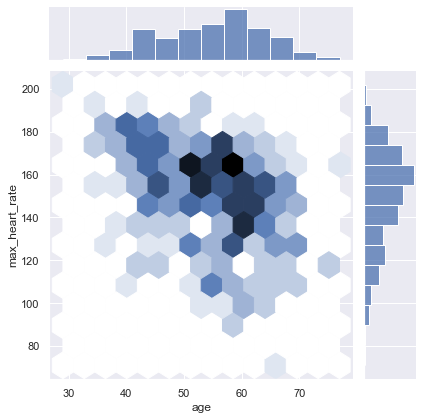

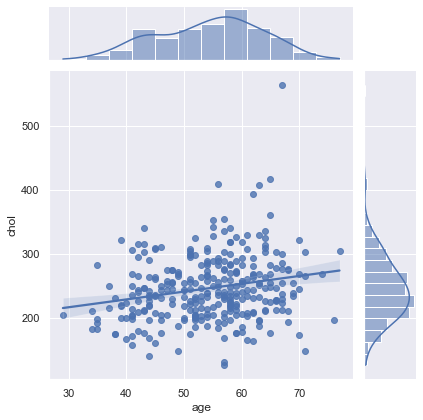

In [6]:
import seaborn as sns
# For Plot 1
sns.jointplot(x = heart_atk_clean_df['age'], y = heart_atk_clean_df['resting_blood_pressure'], kind = 'scatter')
# For Plot 2
sns.jointplot(x = heart_atk_clean_df['age'], y = heart_atk_clean_df['max_heart_rate'], kind = 'hex')
# For Plot 3
sns.jointplot(x = heart_atk_clean_df['age'], y = heart_atk_clean_df['chol'], kind = 'reg')
#能看出随着年龄的增长，血压没有太多线性关系，而心率和chol则呈现较为明显的线性关系。

<AxesSubplot:>

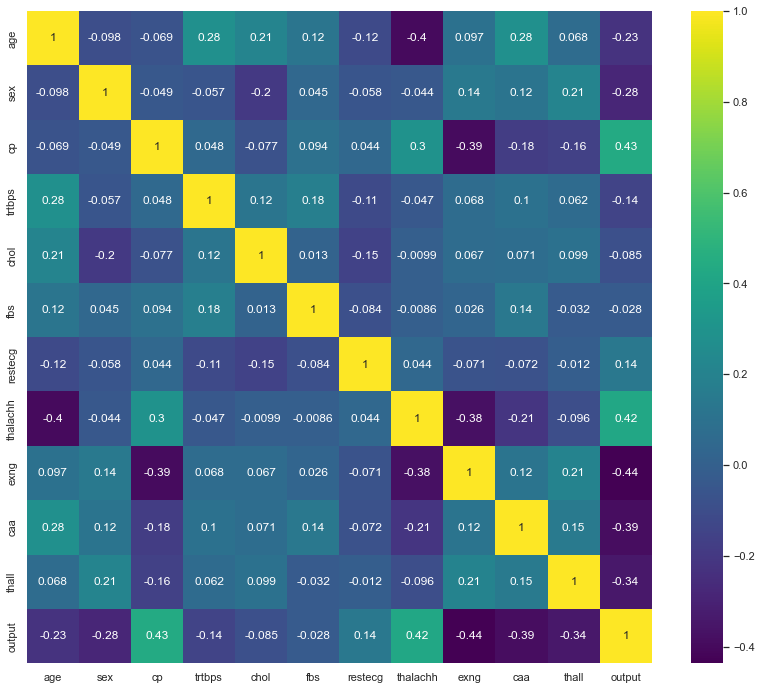

In [7]:
plt.figure(figsize = (14,12))
sns.heatmap(heart_atk_df.corr(), annot = True, cmap = 'viridis')
#颜色越深或越浅关联度越高（当然这里的关联度更多是线性层面上的）
#比如cp和output的关联度（正相关）非常高，这种明显的结论值得后续继续分析。
#比如thalachh和output正向关联度也非常高（0.42）
#而exng和caa和thall与output则是负向关联度很高的变量。
#至于剩下的 chol fbs这两个变量，几乎可以抛弃，他们和结果没太大关系。

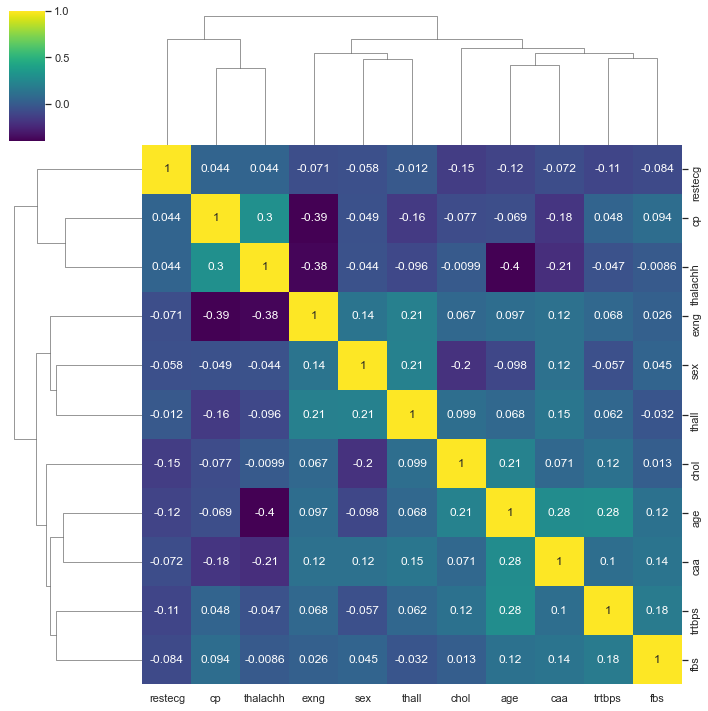

In [8]:
sns.clustermap(heart_atk_df.iloc[:,:-1].corr(), annot=True,cmap='viridis')
#在上图的基础上，数据一个聚类结果，在聚类模型的视角下：前三个变量值的合为一组，中间三个变量值得，剩下五个值得，（一组的意思就是他们的潜在关联比较高，换言之可以相互替代）

<AxesSubplot:xlabel='chest_pain', ylabel='count'>

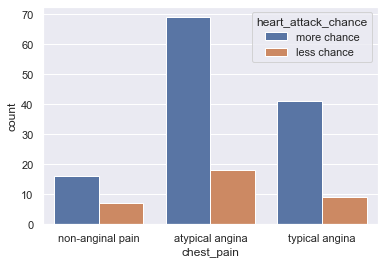

In [9]:
temp = heart_atk_clean_df[heart_atk_clean_df['chest_pain'] != '0']
import seaborn as sns
sns.countplot(x = temp['chest_pain'], hue = temp['heart_attack_chance'])

<AxesSubplot:xlabel='exng', ylabel='output'>

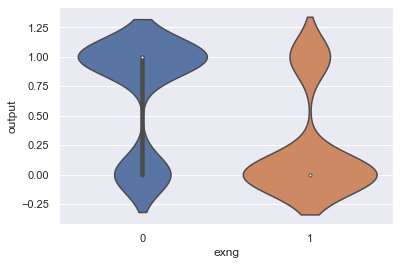

In [10]:
import seaborn as sns
sns.violinplot(y = heart_atk_df['output'], x = heart_atk_df['exng'])
#挺明显的，exng=0的时候，output几乎为1，反之。

<AxesSubplot:xlabel='caa', ylabel='output'>

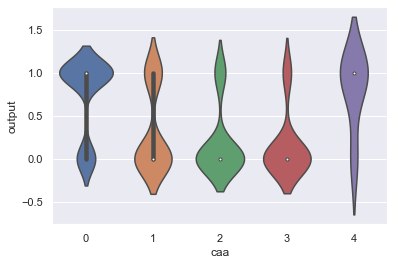

In [11]:
sns.violinplot(y = heart_atk_df['output'], x = heart_atk_df['caa'])
#caa为0和4的时候比较明显 output为 1

<AxesSubplot:xlabel='thall', ylabel='output'>

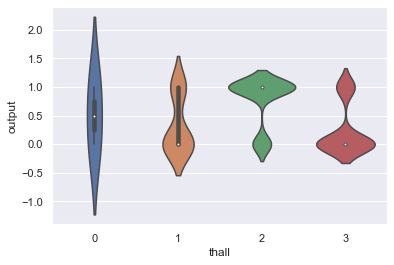

In [12]:
sns.violinplot(y = heart_atk_df['output'], x = heart_atk_df['thall'])
#显然thall = 0的时候是比较难判断的

In [13]:
#查看一下原因，原因是因为就俩数据，所以显得很均匀🐶
heart_atk_df[heart_atk_df['thall'] == 0]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa,thall,output
48,53,0,2,128,216,0,0,115,0,0,0,1
281,52,1,0,128,204,1,1,156,1,0,0,0
